In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# path = '/content/petition.csv'
path ='/content/drive/MyDrive/08_MultiCampus/data_dacon/petition.csv'

In [4]:
!pip install plotnine

In [5]:
from plotnine import *

In [6]:
pd.__version__

'2.0.3'

In [7]:
# !pip install pandas==1.3.5

In [8]:
pd.read_csv(path, on_bad_lines='skip', encoding='utf-8',
            engine='python',
            index_col='article_id',
            parse_dates=['start','end'])

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
...,...,...,...,...,...,...,...
492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...


In [9]:
raw = pd.read_csv(path, on_bad_lines='skip', encoding='utf-8',
            engine='python',
            index_col='article_id',
            parse_dates=['start','end'])

In [10]:
petitions = raw.copy()

In [11]:
petitions.shape

(377755, 7)

In [12]:
petitions.columns

Index(['start', 'end', 'answered', 'votes', 'category', 'title', 'content'], dtype='object')

In [13]:
petitions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377755 entries, 21 to 492043
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   start     377755 non-null  datetime64[ns]
 1   end       377755 non-null  datetime64[ns]
 2   answered  377755 non-null  int64         
 3   votes     377755 non-null  int64         
 4   category  377755 non-null  object        
 5   title     377755 non-null  object        
 6   content   377754 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 23.1+ MB


In [14]:
petitions.head(3)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [15]:
petitions.tail(3)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...
492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...
492043,2019-01-09,2019-02-08,0,1,행정,예천군과 환경부를 규탄합니다. 어불성설인 가축사육 관련 법규를 개정해주세요!,해당 사건이 발생한 곳은 요즘은 매체에서 매일 나오는 곳으로 '군의원의 외유성 해외...


In [16]:
petitions.describe()

,start,end,answered,votes
count,377755,377755,377755.000000,3.777550e+05
mean,2018-05-15 05:34:26.491773696,2018-06-15 04:08:57.910550784,0.000077,1.514073e+02
min,2017-08-19 00:00:00,2017-08-26 00:00:00,0.000000,0.000000e+00
25%,2018-01-22 00:00:00,2018-02-21 00:00:00,0.000000,1.000000e+00
50%,2018-05-19 00:00:00,2018-06-18 00:00:00,0.000000,5.000000e+00
75%,2018-09-05 00:00:00,2018-10-05 00:00:00,0.000000,1.500000e+01
max,2019-01-09 00:00:00,2019-02-08 00:00:00,1.000000,1.192049e+06
std,NaN,NaN,0.008761,4.842557e+03


In [17]:
petitions.describe(include='all')

,start,end,answered,votes,category,title,content
count,377755,377755,377755.000000,3.777550e+05,377755,377755,377754
unique,NaN,NaN,NaN,NaN,17,330205,358059
top,NaN,NaN,NaN,NaN,정치개혁,이명박 출국금지,이명박 출국금지
freq,NaN,NaN,NaN,NaN,59020,3018,597
mean,2018-05-15 05:34:26.491773696,2018-06-15 04:08:57.910550784,0.000077,1.514073e+02,NaN,NaN,NaN
min,2017-08-19 00:00:00,2017-08-26 00:00:00,0.000000,0.000000e+00,NaN,NaN,NaN
25%,2018-01-22 00:00:00,2018-02-21 00:00:00,0.000000,1.000000e+00,NaN,NaN,NaN
50%,2018-05-19 00:00:00,2018-06-18 00:00:00,0.000000,5.000000e+00,NaN,NaN,NaN
75%,2018-09-05 00:00:00,2018-10-05 00:00:00,0.000000,1.500000e+01,NaN,NaN,NaN
max,2019-01-09 00:00:00,2019-02-08 00:00:00,1.000000,1.192049e+06,NaN,NaN,NaN


In [18]:
# 결측치 확인
petitions.isnull().sum()

start       0
end         0
answered    0
votes       0
category    0
title       0
content     1
dtype: int64

In [19]:
petitions.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [20]:
# 국민청원 특성
# 기존 answered 청와대 답변 여부 확인 행
# 답변 대기 중 청원 존재  >> 확인  (20만 건 이상 동의)

In [21]:
(petitions['votes'] > 200000) == 1

article_id
21        False
22        False
23        False
24        False
25        False
          ...  
492039    False
492040    False
492041    False
492042    False
492043    False
Name: votes, Length: 377755, dtype: bool

In [22]:
petitions['answer'] = (petitions['votes'] > 200000) == 1
petitions.shape

(377755, 8)

In [23]:
petitions.head(3)

,start,end,answered,votes,category,title,content,answer
article_id,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False


In [24]:
# 청원기간 컬럼 생성

In [25]:
petitions['duration'] = petitions['end'] - petitions['start']

In [26]:
petitions.head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False,90 days
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False,90 days
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False,15 days


In [27]:
petitions.sort_values('duration', ascending=True)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
13577,2017-09-12,2017-09-19,0,20,육아/교육,사립유치원의 집단휴업을 반대합니다,국공립 유치원도 없고 국공립어린이집 들어가기도 힘든 실정에 사립유치원은 부모들의 어...,False,7 days
4213,2017-09-05,2017-09-12,0,1,인권/성평등,청소년 보호법이 아니라 소년법입니다...,소년법 폐지 청원합니다,False,7 days
4214,2017-09-05,2017-09-12,0,0,정치개혁,소년법 강화,이번 부산여중생 사건을보고 느낍니다.\n소년법 폐지해주셨으면 좋겠습니다.\n아님 강...,False,7 days
12522,2017-09-08,2017-09-15,0,7,정치개혁,호소문,호 소 문\n새 대통령님 안녕하십니까? 저는 금오공과대학교 인라인 동아리 회장 차형...,False,7 days
4218,2017-09-05,2017-09-12,0,0,미래,나라의미래를위해 청소년보호법 폐지해주시길 간절히바랍니다,청소년보호법은 청소년을 위한법이아니라 청소년을 위협하는법이 됬습니다 부디 바로선 법...,False,7 days
...,...,...,...,...,...,...,...,...,...
8224,2017-09-05,2017-12-04,0,0,안전/환경,소년법 폐지,소년법을강화시켜주십시오!,False,90 days
8226,2017-09-05,2017-12-04,0,0,기타,청소년보호법 폐지해주세요,청소년보호법 폐지되야된다고 생각합니다 폐지되길 바래요,False,90 days
8227,2017-09-05,2017-12-04,0,0,정치개혁,소년법폐지,제발 소년법 폐지해주세요. 이런 끔찍한 일이 더이상 없어야합니다.,False,90 days


In [28]:
# 청원기간 별 건수
petitions['duration'].value_counts()

duration
30 days    366555
90 days      6754
7 days       2436
15 days      1204
60 days       806
Name: count, dtype: int64

In [29]:
# 청원기간 90일이고 답변 대상 건수
petitions[(petitions['duration'] == '90 days') & (petitions['answer'] == 1) ]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days


In [30]:
# 청원기간이 60일이고 답변 대상 건

petitions_60 =\
petitions[(petitions['duration'] == '60 days') & (petitions['answer'] == 1) ]

In [31]:
petitions_60.shape

(1, 9)

In [32]:
petitions_60

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days


In [33]:
# 청원기간이 30일이고 답변 대상 건

petitions_30 =\
petitions[(petitions['duration'] == '30 days') & (petitions['answer'] == 1) ]

In [34]:
petitions_30.shape

(75, 9)

In [35]:
petitions_30.head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days


In [36]:
# 청원기간이 7일이고 답변 대상 건

petitions_7 =\
petitions[(petitions['duration'] == '7 days') & (petitions['answer'] == 1) ]

In [37]:
petitions_7.shape

(0, 9)

In [38]:
petitions_7_notanswer = petitions[(petitions['duration'] == '7 days')]
petitions_7_notanswer

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,False,7 days
26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...,False,7 days
28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,False,7 days
35,2017-08-19,2017-08-26,0,0,외교/통일/국방,문재인정부는 신한국형 페리프로세스가 작성했습니다.,문재인 대통령님 신한국형 페리프로세스 로드맵작성 했습니다.\n<신한국형 페리 프로세...,False,7 days
36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...,False,7 days
...,...,...,...,...,...,...,...,...,...
13836,2017-09-14,2017-09-21,0,2,일자리,초등스포츠강사,초등스포츠강사로 5년째 일하고 있습니다 이번에 무기계약직이 불발이 되면서 가슴이 아...,False,7 days
13847,2017-09-14,2017-09-21,0,0,육아/교육,학교를 학교답게 해주세요,안녕하세요!!! 저는 용인시 수지구 수지초등학교 학부모입니다!\n수지초등학교는 인근...,False,7 days
13854,2017-09-14,2017-09-21,0,0,안전/환경,당진경찰서에 범죄단체와 다름없는 당진시 흥신소 상위1-2개 업체를 단속하라고 지시하...,당진경찰서에 범죄단체와 다름없는 당진시 흥신소 상위1-2개 업체를 단속하라고 지시하...,False,7 days


In [39]:
petitions_7_notanswer.shape

(2436, 9)

In [40]:
petitions_7_notanswer['start']

article_id
24      2017-08-19
26      2017-08-19
28      2017-08-19
35      2017-08-19
36      2017-08-19
           ...    
13836   2017-09-14
13847   2017-09-14
13854   2017-09-14
13861   2017-09-14
13872   2017-09-14
Name: start, Length: 2436, dtype: datetime64[ns]

In [41]:
petitions_7_notanswer['start'].value_counts().reset_index()

,start,count
0,2017-09-05,942
1,2017-09-06,335
2,2017-09-04,331
3,2017-09-07,129
4,2017-09-08,94
5,2017-09-03,53
6,2017-09-01,52
7,2017-09-09,43
8,2017-09-12,41
9,2017-08-30,40


In [42]:
petitions_7_count = petitions_7_notanswer['start'].value_counts().reset_index()
petitions_7_count.sort_values('start')

,start,count
25,2017-08-19,9
21,2017-08-20,18
17,2017-08-21,21
23,2017-08-22,15
16,2017-08-23,22
22,2017-08-24,18
18,2017-08-25,20
20,2017-08-26,19
24,2017-08-27,11
15,2017-08-28,24


In [43]:
# 청원기간과 분야별 분석
# 어느 분야의 청원이 가장 많이 들어왔나 확인

petitions.head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False,90 days
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False,90 days
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False,15 days


In [44]:
petitions['category'].value_counts()

category
정치개혁           59020
기타             46449
인권/성평등         33738
안전/환경          29196
교통/건축/국토       26910
외교/통일/국방       25705
육아/교육          24861
보건복지           23608
일자리            22111
행정             19373
문화/예술/체육/언론    17257
미래             17189
경제민주화          16281
성장동력            6991
반려동물            3827
저출산/고령화대책       3461
농산어촌            1778
Name: count, dtype: int64

In [45]:
pd.DataFrame(petitions['category'].value_counts()).reset_index()

,category,count
0,정치개혁,59020
1,기타,46449
2,인권/성평등,33738
3,안전/환경,29196
4,교통/건축/국토,26910
5,외교/통일/국방,25705
6,육아/교육,24861
7,보건복지,23608
8,일자리,22111
9,행정,19373


In [46]:
category = pd.DataFrame(petitions['category'].value_counts()).reset_index()
category.head(3)

,category,count
0,정치개혁,59020
1,기타,46449
2,인권/성평등,33738


In [47]:
# 청원이 얼마동안 집계되었지?

pd.DataFrame(petitions['start'].value_counts()).reset_index()

,start,count
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487
...,...,...
504,2017-08-26,74
505,2017-08-22,69
506,2017-08-27,49
507,2017-08-19,39


In [48]:
start_df = pd.DataFrame(petitions['start'].value_counts()).reset_index()
start_df.head(3)

,start,count
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368


In [49]:
start_df.sort_values('count', ascending=False) # 내림차순 정렬

,start,count
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487
...,...,...
504,2017-08-26,74
505,2017-08-22,69
506,2017-08-27,49
507,2017-08-19,39


In [50]:
start_df = start_df.sort_values('count', ascending=False)

In [51]:
print('청원 집계 : {}일'.format(start_df.shape[0]))

청원 집계 : 509일


In [52]:
# timedelta : 시간차이 구하기

petitions['end'] - petitions['start']

article_id
21       90 days
22       90 days
23       15 days
24        7 days
25       15 days
           ...  
492039   30 days
492040   30 days
492041   30 days
492042   30 days
492043   30 days
Length: 377755, dtype: timedelta64[ns]

In [53]:
petitions.head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False,90 days
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False,90 days
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False,15 days


In [54]:
petitions['start']

article_id
21       2017-08-19
22       2017-08-19
23       2017-08-19
24       2017-08-19
25       2017-08-19
            ...    
492039   2019-01-09
492040   2019-01-09
492041   2019-01-09
492042   2019-01-09
492043   2019-01-09
Name: start, Length: 377755, dtype: datetime64[ns]

In [55]:
petitions['start'] = pd.to_datetime(petitions['start'])
petitions['start']

article_id
21       2017-08-19
22       2017-08-19
23       2017-08-19
24       2017-08-19
25       2017-08-19
            ...    
492039   2019-01-09
492040   2019-01-09
492041   2019-01-09
492042   2019-01-09
492043   2019-01-09
Name: start, Length: 377755, dtype: datetime64[ns]

In [56]:
# datetime 에러 발생시 집계함수 활용 방버

# datetime 열 제외, 피벗 테이블 생성

petitions_temp = petitions.drop(columns=['start', 'end'])
petitions_temp

,answered,votes,category,title,content,answer,duration
article_id,,,,,,,
21,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False,90 days
22,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False,90 days
23,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False,15 days
24,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,False,7 days
25,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False,15 days
...,...,...,...,...,...,...,...
492039,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...,False,30 days
492040,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...,False,30 days
492041,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...,False,30 days


In [57]:
# pivot_table 투표를 가장 많이 받은 분야는 어디일까?

# petitition_category = pd.pivot_table(petitions_temp,
#                         index=['category'],
#                         aggfunc=np.sum)

# petitition_category.head(3)

In [58]:
petitions.columns

Index(['start', 'end', 'answered', 'votes', 'category', 'title', 'content',
       'answer', 'duration'],
      dtype='object')

In [59]:
# 집계함수 방식 지정

agg_func = {
    'answered': np.sum,
    'votes': np.sum,
    'title': 'count',
    'answer': 'first',
    'duration': 'first'
}

petitition_unique = pd.pivot_table(petitions_temp,
                        index=['category'],
                        aggfunc=agg_func)

petitition_unique.head(3)


,answer,answered,duration,title,votes
category,,,,,
경제민주화,False,1,7 days,16281,1720766
교통/건축/국토,False,2,15 days,26910,2834727
기타,False,1,90 days,46449,4720310


In [60]:
petitition_unique.sort_values(by='votes', ascending=False)

,answer,answered,duration,title,votes
category,,,,,
인권/성평등,False,9,90 days,33738,12225998
안전/환경,False,2,90 days,29196,6512799
정치개혁,False,2,30 days,59020,5686172
기타,False,1,90 days,46449,4720310
육아/교육,False,1,30 days,24861,4420589
보건복지,False,2,7 days,23608,4269399
문화/예술/체육/언론,False,4,30 days,17257,4086382
외교/통일/국방,False,1,7 days,25705,3637926
교통/건축/국토,False,2,15 days,26910,2834727


In [61]:
petitition_unique.sort_values(by='votes', ascending=False).reset_index()

,category,answer,answered,duration,title,votes
0,인권/성평등,False,9,90 days,33738,12225998
1,안전/환경,False,2,90 days,29196,6512799
2,정치개혁,False,2,30 days,59020,5686172
3,기타,False,1,90 days,46449,4720310
4,육아/교육,False,1,30 days,24861,4420589
5,보건복지,False,2,7 days,23608,4269399
6,문화/예술/체육/언론,False,4,30 days,17257,4086382
7,외교/통일/국방,False,1,7 days,25705,3637926
8,교통/건축/국토,False,2,15 days,26910,2834727
9,반려동물,False,0,60 days,3827,2023905


In [62]:
petitions_best =  petitition_unique.sort_values(by='votes', ascending=False).reset_index()
petitions_best[:10]

,category,answer,answered,duration,title,votes
0,인권/성평등,False,9,90 days,33738,12225998
1,안전/환경,False,2,90 days,29196,6512799
2,정치개혁,False,2,30 days,59020,5686172
3,기타,False,1,90 days,46449,4720310
4,육아/교육,False,1,30 days,24861,4420589
5,보건복지,False,2,7 days,23608,4269399
6,문화/예술/체육/언론,False,4,30 days,17257,4086382
7,외교/통일/국방,False,1,7 days,25705,3637926
8,교통/건축/국토,False,2,15 days,26910,2834727
9,반려동물,False,0,60 days,3827,2023905


In [64]:
# 투표를 가장 많이 받은 날

petitions_start = pd.pivot_table(petitions, index=['start'], aggfunc=agg_func)

In [65]:
petitions_start.head(3)

,answer,answered,duration,title,votes
start,,,,,
2017-08-19,False,0,90 days,39,20703
2017-08-20,False,0,15 days,88,31710
2017-08-21,False,0,90 days,89,1884


In [66]:
petitions_start.sort_values(by='votes', ascending=False)

,answer,answered,duration,title,votes
start,,,,,
2018-10-17,False,0,30 days,926,1300523
2018-10-31,False,0,30 days,1010,827096
2018-06-13,False,0,30 days,542,786157
2018-10-18,False,0,30 days,1032,721524
2018-02-19,False,1,30 days,698,701520
...,...,...,...,...,...
2017-10-17,False,0,30 days,211,1543
2017-09-24,False,0,30 days,159,1485
2017-10-06,False,0,30 days,258,1172


In [68]:
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] >= 200000]

,answer,answered,duration,title,votes
start,,,,,
2018-10-17,False,0,30 days,926,1300523
2018-10-31,False,0,30 days,1010,827096
2018-06-13,False,0,30 days,542,786157
2018-10-18,False,0,30 days,1032,721524
2018-02-19,False,1,30 days,698,701520
...,...,...,...,...,...
2018-09-18,False,0,30 days,599,210618
2018-08-19,False,0,30 days,765,207406
2018-04-24,False,0,30 days,856,207362


In [70]:
# 청원을 많이 받은 날 / 투표를 많이 받은 날

votes_df.reset_index()

,start,answer,answered,duration,title,votes
0,2018-10-17,False,0,30 days,926,1300523
1,2018-10-31,False,0,30 days,1010,827096
2,2018-06-13,False,0,30 days,542,786157
3,2018-10-18,False,0,30 days,1032,721524
4,2018-02-19,False,1,30 days,698,701520
...,...,...,...,...,...,...
504,2017-10-17,False,0,30 days,211,1543
505,2017-09-24,False,0,30 days,159,1485
506,2017-10-06,False,0,30 days,258,1172
507,2017-09-15,False,0,30 days,74,776


In [71]:
votes_Df = votes_df.reset_index()

In [72]:
start_df.head()

,start,count
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


In [74]:
start_df.merge(votes_df, on='start', how='left')

,start,count,answer,answered,duration,title,votes
0,2017-11-11,9623,False,0,30 days,9623,85074
1,2017-09-05,5952,False,0,90 days,5952,48808
2,2018-01-11,3368,False,0,30 days,3368,44570
3,2018-02-06,2631,False,0,30 days,2631,83038
4,2017-11-09,2487,False,0,30 days,2487,34774
...,...,...,...,...,...,...,...
504,2017-08-26,74,False,0,30 days,74,44654
505,2017-08-22,69,False,0,90 days,69,2607
506,2017-08-27,49,False,0,7 days,49,7147
507,2017-08-19,39,False,0,90 days,39,20703


In [75]:
hottest_day = start_df.merge(votes_df, on='start', how='left')

In [76]:
hottest_day.nlargest(5, 'votes')

,start,count,answer,answered,duration,title,votes
113,2018-10-17,926,False,0,30 days,926,1300523
80,2018-10-31,1010,False,0,30 days,1010,827096
365,2018-06-13,542,False,0,30 days,542,786157
74,2018-10-18,1032,False,0,30 days,1032,721524
259,2018-02-19,698,False,1,30 days,698,701520


In [78]:
hottest_day.nlargest(5, 'count')

,start,count,answer,answered,duration,title,votes
0,2017-11-11,9623,False,0,30 days,9623,85074
1,2017-09-05,5952,False,0,90 days,5952,48808
2,2018-01-11,3368,False,0,30 days,3368,44570
3,2018-02-06,2631,False,0,30 days,2631,83038
4,2017-11-09,2487,False,0,30 days,2487,34774


In [79]:
# 답변 대상 청원
petitions.loc[petitions['votes']>=200000]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days
...,...,...,...,...,...,...,...,...,...
454045,2018-11-27,2018-12-27,0,214251,반려동물,도살장에서 망치로 머리를 맞던 개가 잠시 튀어나가 옆에있는 자신의 새끼에게 젖물리며...,아래의 링크를 봐주세요\n사람과 똑같이 자신의 자식을 귀히여기고 사람과 똑같이 죽는...,True,30 days
462340,2018-12-06,2019-01-05,0,221317,육아/교육,짐승보다 못한 위탁모 에게 굶기고 맞아죽은 15개월된 저희딸 얘기좀 들어주세요....,짐승 같은 위탁모(김모씨) 에게 맞아 죽은 15개월 된 저희 딸 서원이가 억울하게 ...,True,30 days
462623,2018-12-07,2019-01-06,0,243938,정치개혁,국회의원 내년 연봉 2000만원 인상 추진..최저임금 인상률보다 높은 14%.. 셀...,국회의원 내년 연봉 2000만원 인상 추진..최저임금 인상률보다 높은 14%로 인상...,True,30 days


In [80]:
answered = petitions.loc[petitions['votes']>=200000]
print('답변 대상 청원: {} 건'.format(answered.shape[0]))

답변 대상 청원: 77 건


In [81]:
# 답변 대상 청원 중에서 투표를 가장 많이 받은 것
answered.sort_values('votes', ascending=False).head(10)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days
269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,True,30 days
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",True,30 days
230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,True,30 days
426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,True,30 days
314584,2018-07-22,2018-08-21,0,413924,육아/교육,23개월 아기가 폭행에 장이 끊어져 죽었습니다.,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,True,30 days
395955,2018-10-02,2018-11-01,1,406655,교통/건축/국토,음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요,"9월 25일 새벽 2시 25분 경, 부산 해운대구 미포 오거리에서 술에 만취한 운전...",True,30 days
437737,2018-11-09,2018-12-09,0,397079,인권/성평등,억울하게 떠나신 저의 아버지의 원한을 풀어주세요,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,True,30 days


In [82]:
answered.sort_values('votes', ascending=False).tail(10)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
49083,2017-11-24,2017-12-24,1,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",True,30 days
173355,2018-03-23,2018-04-22,0,209494,안전/환경,위장•몰래카메라 판매금지와 몰카범죄 처벌을 강화해주세요.,2012년 전국의 몰카범죄는 2400건 2015년에 들어 3배 이상 증가해 무려 7...,True,30 days
322420,2018-07-29,2018-08-28,0,208543,인권/성평등,웹하드 카르텔과 디지털성범죄 산업에 대해 특별 수사를 요구한다.,- 정부는 7월 28일 '그것이 알고싶다' 방송으로 드러난 웹하드 카르텔을 수사하라...,True,30 days
141333,2018-02-17,2018-03-19,1,208522,문화/예술/체육/언론,"연극인 이윤택씨의 상습 성폭행, 성폭력 피의사실에 대한 철저한 진상규명과 조사를 촉...",< 연극인 이윤택씨의 상습 성폭행 및 성폭력 피의사실 의혹에 대해 다음과 같은 청원...,True,30 days
294226,2018-07-03,2018-08-02,0,208202,인권/성평등,여고생이 중고생8명에게 관악산끌려가 집단폭행을당했습니다 소년법폐지또는 개정청원합니다,서울에서 여고생이 관악산에끌려가 집단폭행을당했습니다\n안녕하세요 티비에서만 나오던 ...,True,30 days
134590,2018-02-08,2018-03-10,1,207772,경제민주화,경제민주화,김상조 공정거래위원장이 경제정의 구현을 위한 정책들에 대해서 적극적인 지지를 보냅...,True,30 days
273112,2018-06-17,2018-07-17,0,207275,외교/통일/국방,남편선교사가 안티폴로감옥에 있습니다. (필리핀),저는 기독교대한성결교회 파송 배순영선교사입니다.\n남편(백영모선교사)과 저는 필리핀...,True,30 days
436901,2018-11-09,2018-12-09,0,206447,인권/성평등,부하 여군을 강간한 두 명의 해군 간부를 처벌해주십시오.,2010년 9월경 해군 중위가 직속상관에게 상습적 강간과 강제 추행을 당한 사건이 ...,True,30 days
446686,2018-11-19,2018-12-19,0,202548,인권/성평등,"경찰은 ‘일베 여친, 전여친 몰카사건’을 철저히 수사해서 범죄자들 처벌하라","2018년 11월 18일 ‘일간 베스트’ 사이트에 여친인증, 전여친인증 등의제목의 ...",True,30 days


In [86]:
# 한글 폰트 사용

!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 8.6 MB/s eta 0:00:00


In [87]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

font_family = 'NanumGothic'
font_family

'NanumGothic'

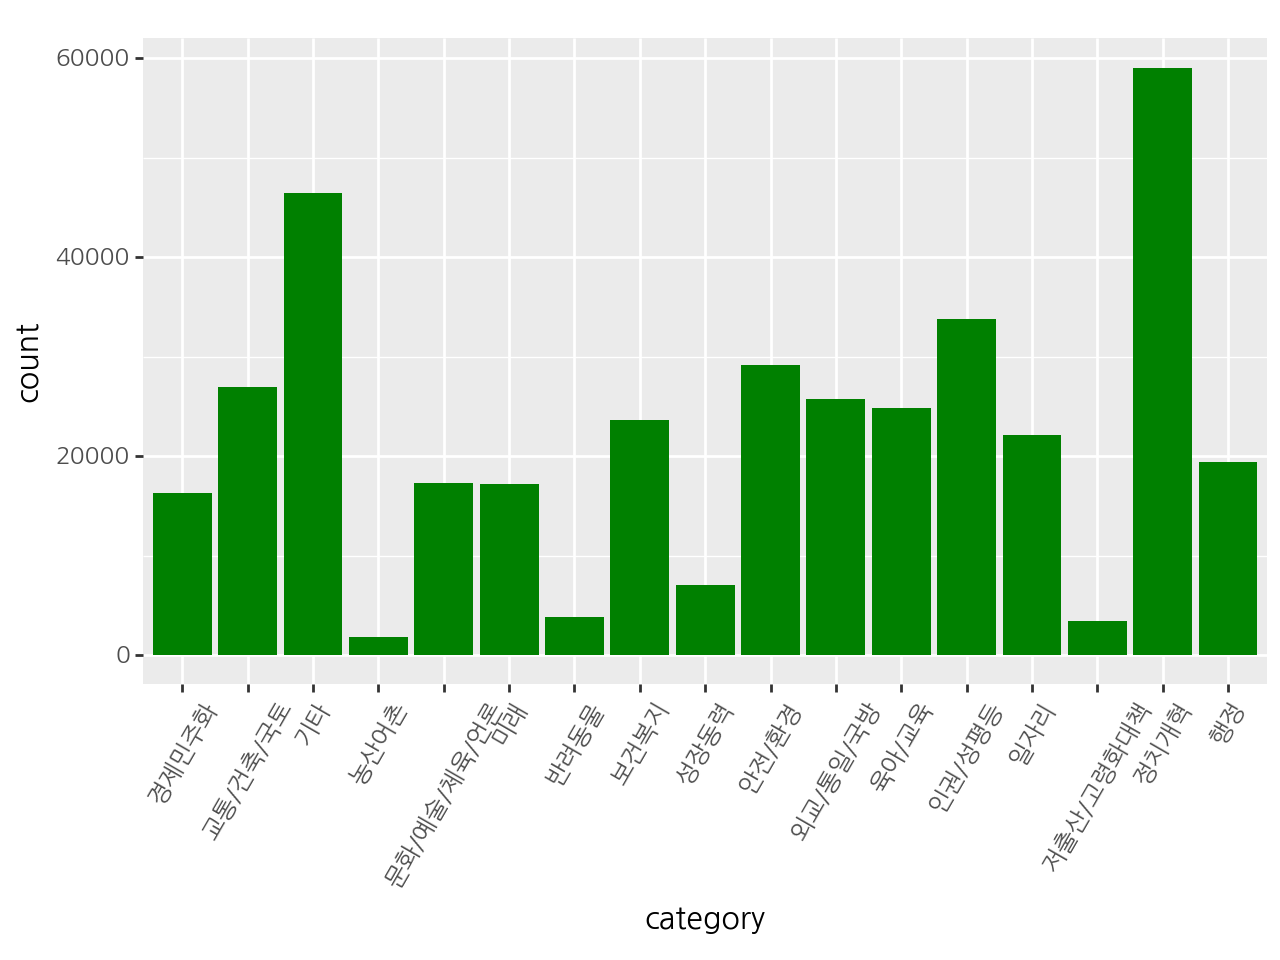

<Figure Size: (640 x 480)>

In [88]:
# 시각화

(ggplot(petitions)
+ aes('category')
+ geom_bar(fill='green')
+ theme(text=element_text(family=font_family),
        axis_text_x = element_text(rotation=60)))

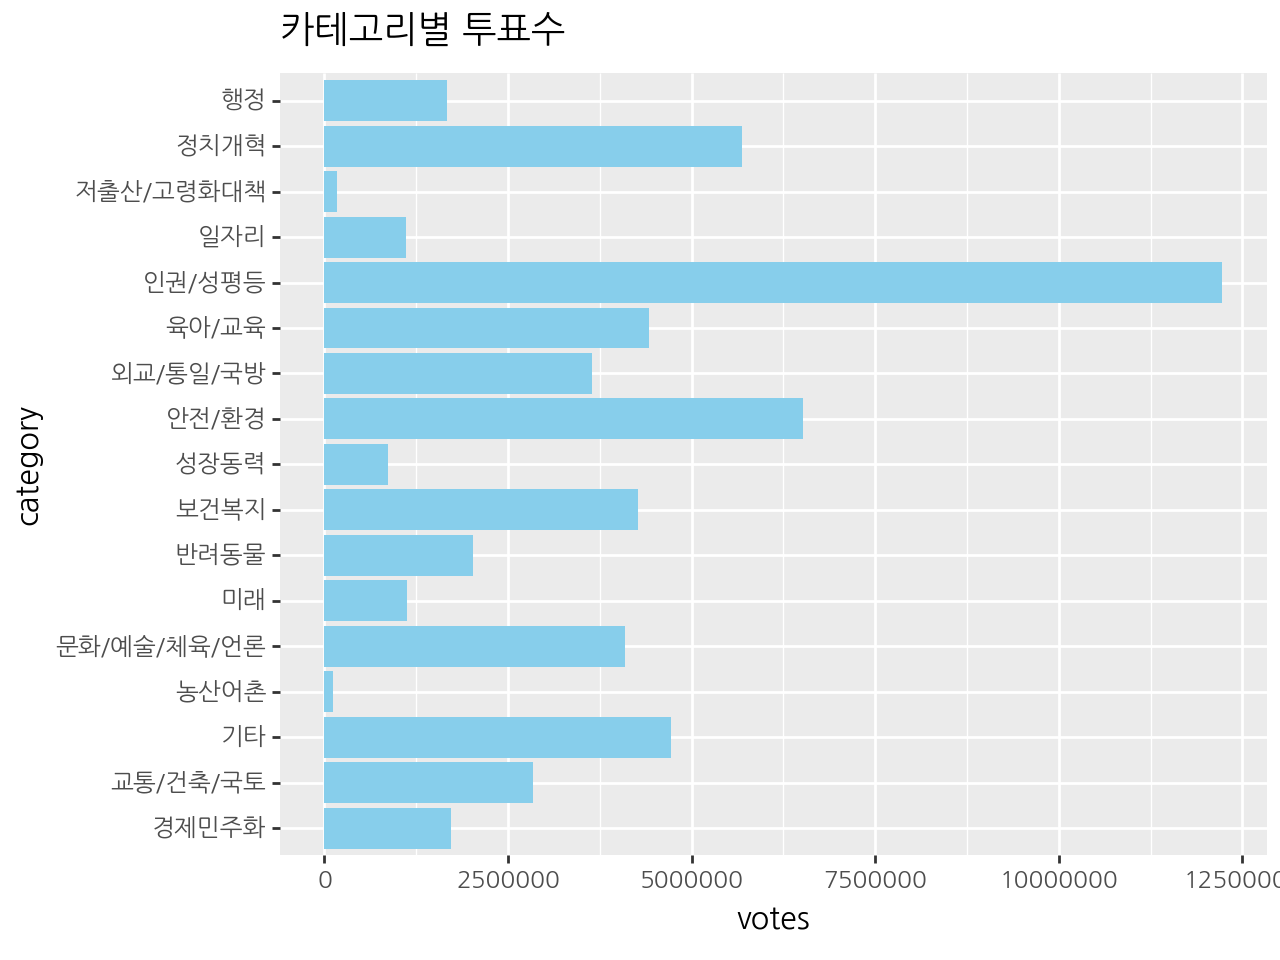

<Figure Size: (640 x 480)>

In [91]:
# 카테고리별 투표수

(ggplot(petitions)
+ aes(x='category', y='votes')
+ geom_col(fill='skyblue')
+ ggtitle('카테고리별 투표수')
+ coord_flip()
+ theme(text=element_text(family=font_family)))

In [92]:
# 투표를 가장 많은 받은 카테고리 : 인권/성평등

petitions.loc[(petitions['category']=='인권/성평등')]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
33,2017-08-19,2017-11-17,0,15,인권/성평등,납득할 수 있는 장애 재판정을 받고 싶습니다.,안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...,False,90 days
36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...,False,7 days
115,2017-08-20,2017-09-19,0,0,인권/성평등,양성평등,안녕하세요. 저는 서울문영여자고등학교에 재학 중인 1학년 김가영입니다. 저는 교내에...,False,30 days
171,2017-08-21,2017-09-20,0,8,인권/성평등,국민청원이라는게 억울한 사람들 청원경쟁 시키는 겁니까?,교통사고 피해자의 보호자로서 불합리하고 부당했던 정부의 정책으로 인해 아버지를 잃고...,False,30 days
204,2017-08-21,2017-11-19,0,20,인권/성평등,공무원의 단체행동권만이라도 보장해주십시오. 헌법에도 명시된 집회의 자유. 요즘엔 공...,민주노총 파업소식이 들리고 시위할때마다 언론에 관심이 쏟아지면 한 쪽에 치우쳐서 듣...,False,90 days
...,...,...,...,...,...,...,...,...,...
492025,2019-01-09,2019-02-08,0,49,인권/성평등,심석희 선수의 인생을 검게 망가뜨린 조재범 코치를 매장해주세요,심석희 선수를 오랜시간에 걸쳐 인생을 암울하게 만들고 그나마 그것도 모자라 ...,False,30 days
492026,2019-01-09,2019-02-08,0,50,인권/성평등,대한체육회 대대적감사 및처벌.. 해체촉구,"빙상선수에 대한 조재범 전 코치의 성폭력사태는 개인의 일탈 범법행위가 아닌,빙상연맹...",False,30 days
492028,2019-01-09,2019-02-08,0,1,인권/성평등,조재범,"빙산계??\n누구가 누굴 탄원한다는건가~!!!\n똑같은 념들이,,~~~",False,30 days


In [93]:
human_rights = petitions.loc[(petitions['category']=='인권/성평등')]
human_rights.sort_values('votes', ascending=False)[:10]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,True,30 days
426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,True,30 days
437737,2018-11-09,2018-12-09,0,397079,인권/성평등,억울하게 떠나신 저의 아버지의 원한을 풀어주세요,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,True,30 days
442093,2018-11-14,2018-12-14,0,365418,인권/성평등,이수역 폭행사건,11월 13일 새벽4시 경 이수역의 한 맥주집에서 남자 다섯명이 여성 두 명을 폭행...,True,30 days
369690,2018-09-06,2018-10-06,0,330587,인권/성평등,제 남편의 억울함을 풀어주세요!,제 남편이 어제 재판에서 징역6개월을 받고 그 자리에서 법정구속 되었습니다\n어제 ...,True,30 days
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days
472309,2018-12-18,2019-01-17,0,269110,인권/성평등,조재범 코치를 강력처벌해주세요,그는 국가대표 심석희 외 다수의 여자선수들을 지속적으로 적어도 14년간 폭행해온 쓰...,True,30 days
412722,2018-10-20,2018-11-19,0,261418,인권/성평등,조두순의 출소를 반대합니다,제 얘기를 하기에 앞서 요즘 페이스북이라는 sns에서 화제가 되고 있는 글을 하나 ...,True,30 days
398030,2018-10-04,2018-11-03,0,257471,인권/성평등,성범죄피해자의 집주소와 주민번호등을 가해자에게 보내는 법원을 막아주세요,안녕하세요 저는 24살 95년생 여성입니다.\n2015년도에 준강간을 당해서 고소를...,True,30 days


In [96]:
# 일별 투표수

petitions.groupby(['start'])['votes'].sum()

start
2017-08-19     20703
2017-08-20     31710
2017-08-21      1884
2017-08-22      2607
2017-08-23     13446
               ...  
2019-01-05     31290
2019-01-06     10687
2019-01-07    352139
2019-01-08     53412
2019-01-09     59430
Name: votes, Length: 509, dtype: int64

In [97]:
petitions.groupby(['start'])['votes'].sum().reset_index()

,start,votes
0,2017-08-19,20703
1,2017-08-20,31710
2,2017-08-21,1884
3,2017-08-22,2607
4,2017-08-23,13446
...,...,...
504,2019-01-05,31290
505,2019-01-06,10687
506,2019-01-07,352139
507,2019-01-08,53412


In [98]:
petition_votes = petitions.groupby(['start'])['votes'].sum().reset_index()
petition_votes.head()

,start,votes
0,2017-08-19,20703
1,2017-08-20,31710
2,2017-08-21,1884
3,2017-08-22,2607
4,2017-08-23,13446


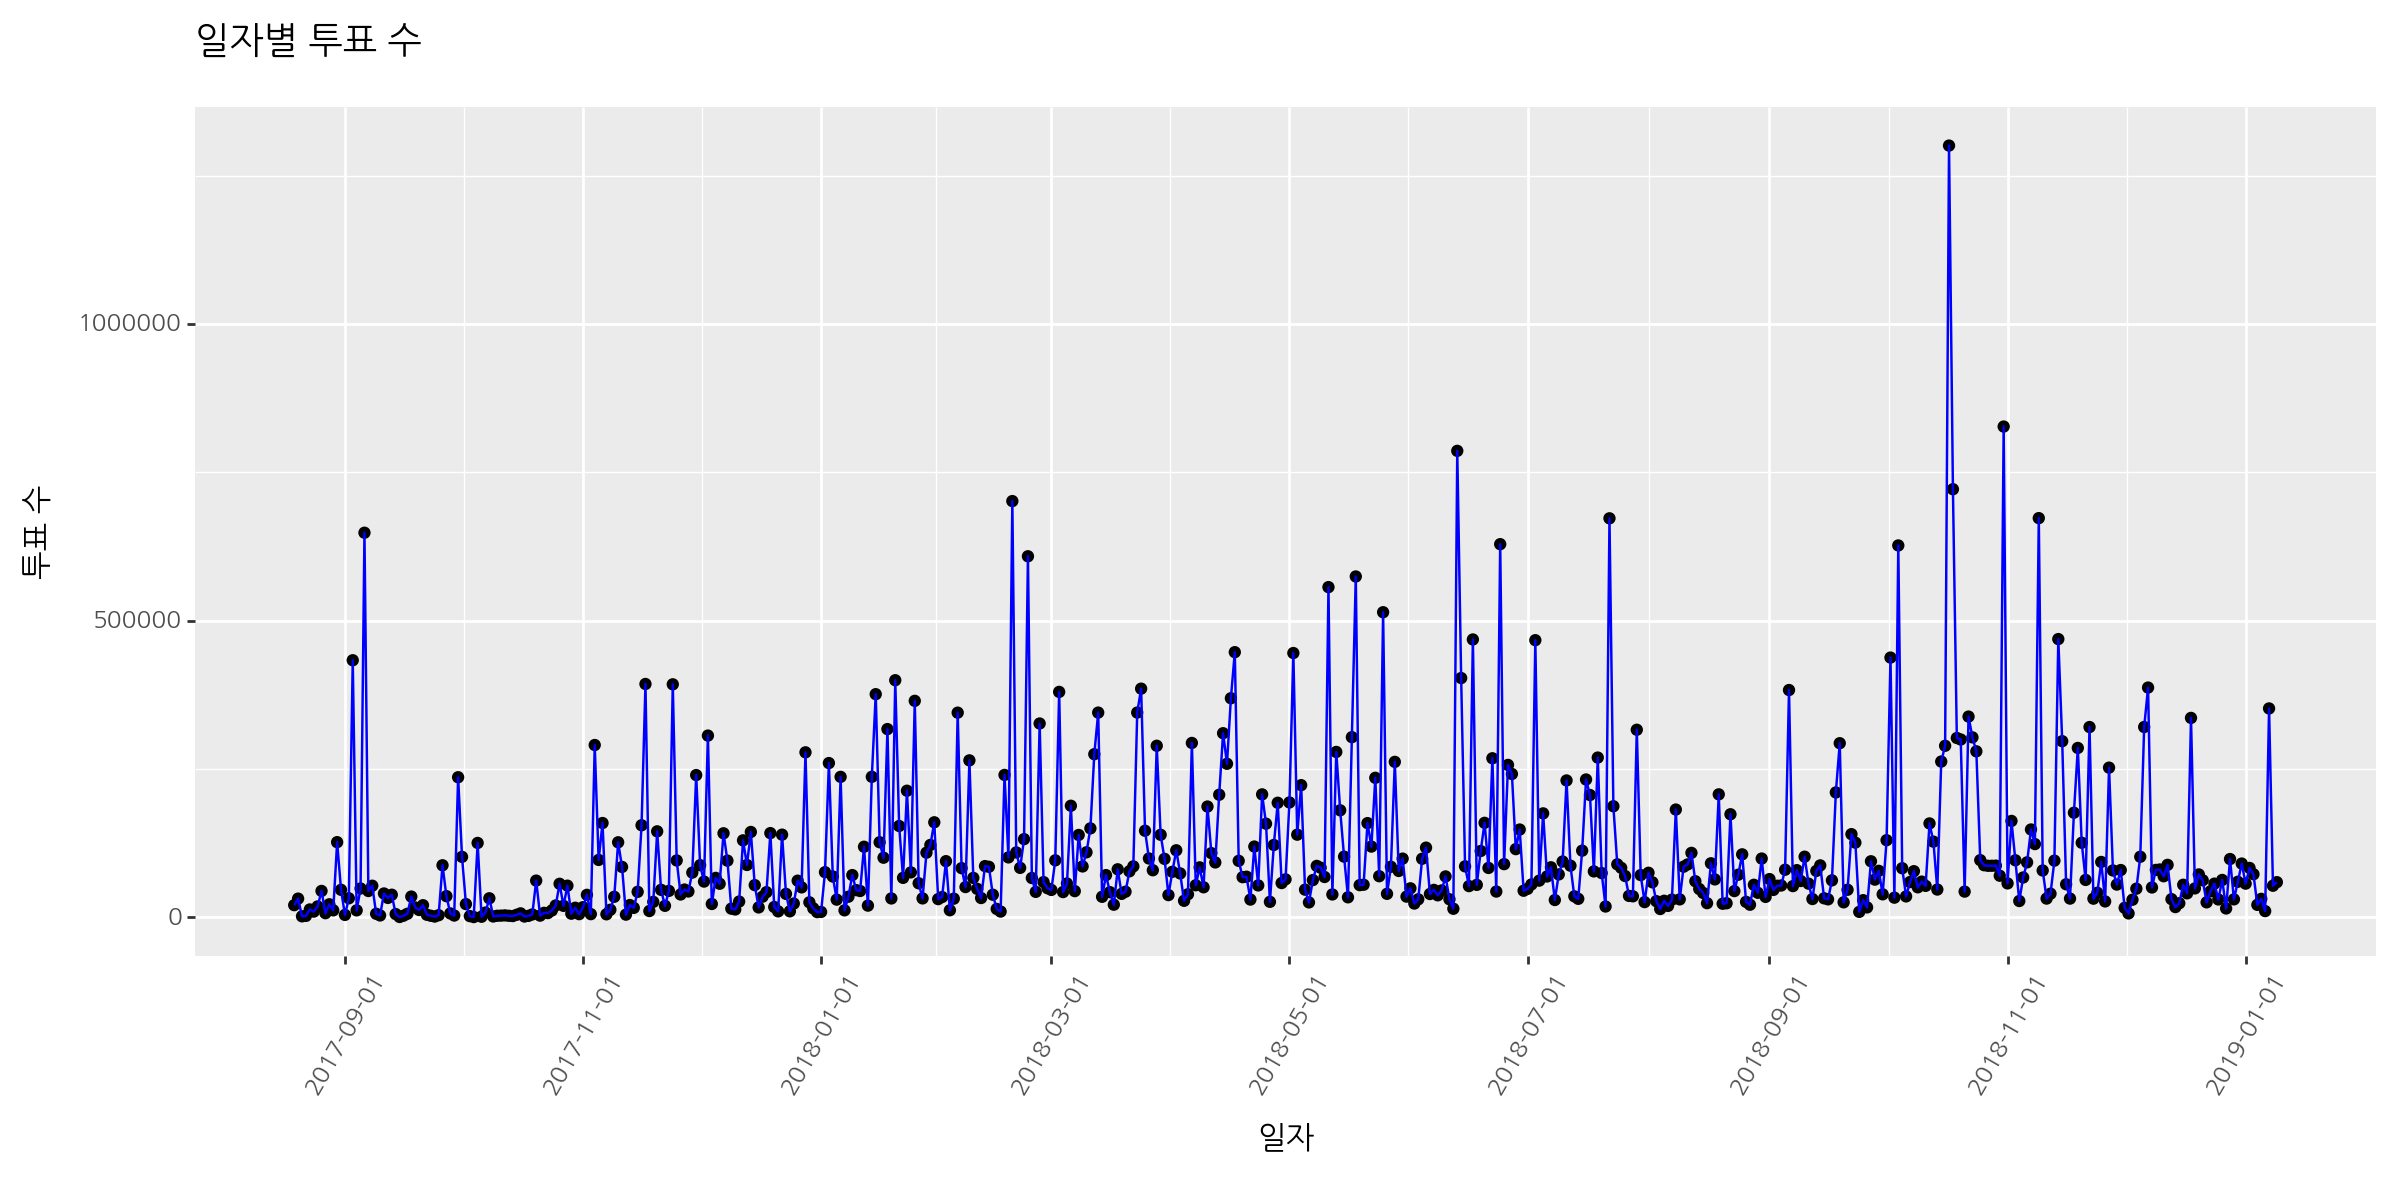

<Figure Size: (1200 x 600)>

In [100]:
(ggplot(petition_votes)
+aes(x='start', y='votes')
+geom_point()
+geom_line(color='blue')
+labs(x='일자', y='투표 수', title='일자별 투표 수')
+theme(text=element_text(family=font_family),
        figure_size=(12,6),
        axis_text_x = element_text(rotation=60))
 )

In [103]:
petition_votes[petition_votes['votes'] >= 200000]

,start,votes
15,2017-09-03,433356
18,2017-09-06,648209
42,2017-09-30,236213
77,2017-11-04,290520
90,2017-11-17,393348
...,...,...
465,2018-11-27,252385
474,2018-12-06,320882
475,2018-12-07,387305
486,2018-12-18,336186


In [104]:
petition_votes[petition_votes['votes'] > 1000000]

,start,votes
424,2018-10-17,1300523


In [108]:
petitions[petitions['votes'] > 1000000]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days


In [109]:
condition = (petitions['start'] == '2018-10-17') & (petitions['votes'] > 1000000)

petitions[condition]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days


soynlp : 명사 추출

In [110]:
!pip install soynlp
!pip show soynlp
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 6.2 MB/s eta 0:00:00
Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, scikit-learn, scipy
Required-by: 


In [111]:
petitions.head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False,90 days
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False,90 days
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False,15 days


In [116]:
# keyword 를 추출했다고 가정
import re

p = r'.*(돌봄|육아|초등|보육).*'
# r : raw string, '.*' 임의 문자, 0개 이상
condition = (petitions['title'].str.match(p)) | (petitions['content'].str.match(p, flags=re.MULTILINE))
#  flags=re.MULTILINE 여러 줄(multi-lines)에서 패턴 검색

petitions[condition]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,False,7 days
36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...,False,7 days
45,2017-08-19,2017-11-17,0,0,육아/교육,초등학교 교사 임용 시험 관련 해결방안,초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...,False,90 days
49,2017-08-19,2017-11-17,0,27,일자리,공정한사회 절차가 바른사회가 되기를 원합니다.,문재인대통령과 교육부장관님!\n교사 정규직은 임용고시라는 제도를 통해 정교사가 될 ...,False,90 days
56,2017-08-19,2017-11-17,0,5,보건복지,장애아의 상태에 따른 장애아돌봄도우미 정책의 한계에 관하여...읽어주셨으면 하고 글...,"안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입...",False,90 days
...,...,...,...,...,...,...,...,...,...
491634,2019-01-09,2019-02-08,0,19,인권/성평등,문재인 정권은 남녀 역차별하지말고 불평등한 여성 위주 정책 철회하라!!!!!,요즘 문재인 정권 하는 수준보면 진짜 역겹네요\n20대처럼 진보적인 나이대에서 지지...,False,30 days
491698,2019-01-09,2019-02-08,0,90,문화/예술/체육/언론,대한빙상연맹 해체를 요구합니다,빙상연맹을 다시금 태어나게 하기 위해 해체를 건의합니다.\n미국 체조협회는 코치의 ...,False,30 days
491776,2019-01-09,2019-02-08,0,3,일자리,장애인 일자리를 지켜주세요,제주에 사는 김응순입니다. 큰 딸 아이가 지적장애인 2급입니다. 요즘 나라에서 일자...,False,30 days


In [117]:
care = petitions[condition]
care.shape

(14960, 9)

In [118]:
care.head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,False,7 days
36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...,False,7 days
45,2017-08-19,2017-11-17,0,0,육아/교육,초등학교 교사 임용 시험 관련 해결방안,초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...,False,90 days


In [119]:
sample_idx = 24

In [120]:
care.loc[sample_idx, 'title']

'공공기관 무조건적인 정규직전환을 반대합니다.'

In [121]:
sample_title = care.loc[sample_idx, 'title']
sample_title

'공공기관 무조건적인 정규직전환을 반대합니다.'

In [123]:
care['content'][24]

'현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인맥으로 들어온 경우가 많습니다. 자질이 안되는데도 정규직이 된다면 그 피해는 국민들에게 돌아갈것입니다. 현재 공공기관 정규직들은 100대1의 경쟁률을 뚫고 들어온 경우도 있습니다. 지금도 노량진에서 수많은 청춘들이 공부를 하고 있죠. 기존 비정규직들을 무조건적으로 무기직 전환한다면 또 다른 정유라 탄생이고 역차별입니다. 새로 필요로 하는 신규채용부터 공채절차를 거쳐 무기직 전환해야합니다. 예전에 공무원 기능직의 일반직 전환, 초등학교에 중초교사 임용 등이 그 예죠. 실제 일하는 곳에서는 그분들로 인한 업무처리 미흡으로 문제가 되고 있습니다. 사립학교는 인건비를 국가에서 주니 사립학교도 국가에서 공채해야 합니다. 부디 사례 하나하나를 보아가며 처리해주시고 전체 정규직 숫자 전환만 보며 공약실천을 무리하게 하지 말아주세요.  국민들은 정의로운 나라를 원합니다. 역차별이 아닌 공정한 채용이 되게 해주세요.'

In [124]:
care['content'][sample_idx]

'현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인맥으로 들어온 경우가 많습니다. 자질이 안되는데도 정규직이 된다면 그 피해는 국민들에게 돌아갈것입니다. 현재 공공기관 정규직들은 100대1의 경쟁률을 뚫고 들어온 경우도 있습니다. 지금도 노량진에서 수많은 청춘들이 공부를 하고 있죠. 기존 비정규직들을 무조건적으로 무기직 전환한다면 또 다른 정유라 탄생이고 역차별입니다. 새로 필요로 하는 신규채용부터 공채절차를 거쳐 무기직 전환해야합니다. 예전에 공무원 기능직의 일반직 전환, 초등학교에 중초교사 임용 등이 그 예죠. 실제 일하는 곳에서는 그분들로 인한 업무처리 미흡으로 문제가 되고 있습니다. 사립학교는 인건비를 국가에서 주니 사립학교도 국가에서 공채해야 합니다. 부디 사례 하나하나를 보아가며 처리해주시고 전체 정규직 숫자 전환만 보며 공약실천을 무리하게 하지 말아주세요.  국민들은 정의로운 나라를 원합니다. 역차별이 아닌 공정한 채용이 되게 해주세요.'

In [129]:
sample_content = care['content'][sample_idx]

In [125]:
# 토큰화

from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [126]:
tokenizer.tokenize(sample_title)

['공공기관', '무조건적인', '정규직전환을', '반대합니다', '.']

In [127]:
tokenized_title = tokenizer.tokenize(sample_title)

In [131]:
print(tokenizer.tokenize(sample_content))

['현정부에서', '정규직', '일자리를', '늘리는', '것에', '찬성합니다', '.', '그런데', '공공기관', '비정규직들은', '인맥으로', '들어온', '경우가', '많습니다', '.', '자질이', '안되는데도', '정규직이', '된다면', '그', '피해는', '국민들에게', '돌아갈것입니다', '.', '현재', '공공기관', '정규직들은', '100', '대', '1', '의', '경쟁률을', '뚫고', '들어온', '경우도', '있습니다', '.', '지금도', '노량진에서', '수많은', '청춘들이', '공부를', '하고', '있죠', '.', '기존', '비정규직들을', '무조건적으로', '무기직', '전환한다면', '또', '다른', '정유라', '탄생이고', '역차별입니다', '.', '새로', '필요로', '하는', '신규채용부터', '공채절차를', '거쳐', '무기직', '전환해야합니다', '.', '예전에', '공무원', '기능직의', '일반직', '전환', ',', '초등학교에', '중초교사', '임용', '등이', '그', '예죠', '.', '실제', '일하는', '곳에서는', '그분들로', '인한', '업무처리', '미흡으로', '문제가', '되고', '있습니다', '.', '사립학교는', '인건비를', '국가에서', '주니', '사립학교도', '국가에서', '공채해야', '합니다', '.', '부디', '사례', '하나하나를', '보아가며', '처리해주시고', '전체', '정규직', '숫자', '전환만', '보며', '공약실천을', '무리하게', '하지', '말아주세요', '.', '국민들은', '정의로운', '나라를', '원합니다', '.', '역차별이', '아닌', '공정한', '채용이', '되게', '해주세요', '.']


In [132]:
tokenized_content = tokenizer.tokenize(sample_content)

In [133]:
print(len(tokenized_title))

5


In [134]:
print(len(tokenized_content))

125


In [135]:
# 텍스트 데이터 전처리

# 개행문자(줄바꿈 문자) 제거 ('\n')

care['content']

article_id
24        현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
36        문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...
45        초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...
49        문재인대통령과 교육부장관님!\n교사 정규직은 임용고시라는 제도를 통해 정교사가 될 ...
56        안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입...
                                ...                        
491634    요즘 문재인 정권 하는 수준보면 진짜 역겹네요\n20대처럼 진보적인 나이대에서 지지...
491698    빙상연맹을 다시금 태어나게 하기 위해 해체를 건의합니다.\n미국 체조협회는 코치의 ...
491776    제주에 사는 김응순입니다. 큰 딸 아이가 지적장애인 2급입니다. 요즘 나라에서 일자...
491889    8살 남자아이를 키우고있는 엄마입니다\n몇일전 저희 신랑이 갑자기 부산에서 서울로 ...
491966    미국전쟁영웅이자 한국에서도 마찬가지로 영웅인분을 교과서에 실어서 기리면 좋겠습니다\...
Name: content, Length: 14960, dtype: object

In [136]:
care['content'].str.replace("\\\\n", "", regex=True)
# str.replace() 에서 "\\\\n" 두 개의 \\ >> 하나의 슬래시 \ >> '\n'

article_id
24        현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
36        문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...
45        초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에1지망 2지망...
49        문재인대통령과 교육부장관님!교사 정규직은 임용고시라는 제도를 통해 정교사가 될 수 ...
56        안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입...
                                ...                        
491634    요즘 문재인 정권 하는 수준보면 진짜 역겹네요20대처럼 진보적인 나이대에서 지지율 ...
491698    빙상연맹을 다시금 태어나게 하기 위해 해체를 건의합니다.미국 체조협회는 코치의 짐승...
491776    제주에 사는 김응순입니다. 큰 딸 아이가 지적장애인 2급입니다. 요즘 나라에서 일자...
491889    8살 남자아이를 키우고있는 엄마입니다몇일전 저희 신랑이 갑자기 부산에서 서울로 발령...
491966    미국전쟁영웅이자 한국에서도 마찬가지로 영웅인분을 교과서에 실어서 기리면 좋겠습니다h...
Name: content, Length: 14960, dtype: object

In [137]:
content_text = care['content'].str.replace("\\\\n", "", regex=True)
content_text

article_id
24        현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
36        문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...
45        초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에1지망 2지망...
49        문재인대통령과 교육부장관님!교사 정규직은 임용고시라는 제도를 통해 정교사가 될 수 ...
56        안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입...
                                ...                        
491634    요즘 문재인 정권 하는 수준보면 진짜 역겹네요20대처럼 진보적인 나이대에서 지지율 ...
491698    빙상연맹을 다시금 태어나게 하기 위해 해체를 건의합니다.미국 체조협회는 코치의 짐승...
491776    제주에 사는 김응순입니다. 큰 딸 아이가 지적장애인 2급입니다. 요즘 나라에서 일자...
491889    8살 남자아이를 키우고있는 엄마입니다몇일전 저희 신랑이 갑자기 부산에서 서울로 발령...
491966    미국전쟁영웅이자 한국에서도 마찬가지로 영웅인분을 교과서에 실어서 기리면 좋겠습니다h...
Name: content, Length: 14960, dtype: object

In [139]:
content_text.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]", " ", regex=True)
# 한글 또는 영어소대문자 아닌 것 >> 공백으로 대체

article_id
24        현정부에서 정규직 일자리를 늘리는 것에 찬성합니다  그런데 공공기관 비정규직들은 인...
36        문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다  대한민국...
45        초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에 지망  지망...
49        문재인대통령과 교육부장관님 교사 정규직은 임용고시라는 제도를 통해 정교사가 될 수 ...
56        안녕하세요  저는 그냥 평범한 대학생이며  고등학생인 자폐  급 남동생을 둔 누나입...
                                ...                        
491634    요즘 문재인 정권 하는 수준보면 진짜 역겹네요  대처럼 진보적인 나이대에서 지지율 ...
491698    빙상연맹을 다시금 태어나게 하기 위해 해체를 건의합니다 미국 체조협회는 코치의 짐승...
491776    제주에 사는 김응순입니다  큰 딸 아이가 지적장애인  급입니다  요즘 나라에서 일자...
491889     살 남자아이를 키우고있는 엄마입니다몇일전 저희 신랑이 갑자기 부산에서 서울로 발령...
491966    미국전쟁영웅이자 한국에서도 마찬가지로 영웅인분을 교과서에 실어서 기리면 좋겠습니다h...
Name: content, Length: 14960, dtype: object

In [140]:
context_text = content_text.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]", " ", regex=True)

In [141]:
context_text.head(3)

article_id
24    현정부에서 정규직 일자리를 늘리는 것에 찬성합니다  그런데 공공기관 비정규직들은 인...
36    문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다  대한민국...
45    초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에 지망  지망...
Name: content, dtype: object